In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import os

In [27]:
ends = pd.read_csv("/Users/brentkong/Documents/curling/data_processing/processed_data/ends_processed.csv")

In [28]:
pp_varient = {"PP": ends.loc[ends["PowerPlayBool"] == 1],  "NO_PP": ends.loc[ends["PowerPlayBool"] == 0]}
final = {}
for action, variant in pp_varient.items():
    out = {}
    for end in range(1, 9):
        value_counts = variant.loc[variant["EndID"] == end]["EndDiff"].value_counts().to_dict()
        for key in value_counts:
            value_counts[key] /= len(variant.loc[variant["EndID"] == end])
        out[end] = value_counts
    final[action] = out

output_dir = "/Users/brentkong/Documents/curling/figures/analysis/end_frequency"
os.makedirs(output_dir, exist_ok=True)

actions = ["PP", "NO_PP"]
colors = {"PP": "blue", "NO_PP": "red"}

all_enddiffs = set()
for action in actions:
    for end in final[action]:
        all_enddiffs.update(final[action][end].keys())
all_enddiffs = sorted(all_enddiffs)

for end in range(1, 9):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    for action in actions:
        if end not in final[action] or len(final[action][end]) < 3:
            continue
        
        probs = [final[action][end].get(ed, 0) for ed in all_enddiffs]
        ax.bar(
            [ed + (0.2 if action == "PP" else -0.2) for ed in all_enddiffs],
            probs,
            width=0.4,
            color=colors[action],
            alpha=0.7,
            label=action
        )
    
    ax.set_title(f"End {end} Frequency of End Difference")
    ax.set_xlabel("End Difference")
    ax.set_ylabel("Frequency")
    ax.set_xticks(all_enddiffs)
    ax.set_ylim(0, max(max(final["PP"].get(end, {}).values(), default=0), 
                       max(final["NO_PP"].get(end, {}).values(), default=0)) + 0.05)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)
    ax.legend()
    
    save_path = os.path.join(output_dir, f"end_{end}_frequency.png")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close(fig)
    print(f"Saved End {end} frequency plot to {save_path}")


Saved End 1 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_1_frequency.png
Saved End 2 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_2_frequency.png
Saved End 3 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_3_frequency.png
Saved End 4 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_4_frequency.png
Saved End 5 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_5_frequency.png
Saved End 6 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_6_frequency.png
Saved End 7 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_7_frequency.png
Saved End 8 frequency plot to /Users/brentkong/Documents/curling/figures/analysis/end_frequency/end_8_frequency.png


In [29]:
pp_varient = {"PP": ends.loc[ends["PowerPlayBool"] == 1],  "NO_PP": ends.loc[ends["PowerPlayBool"] == 0]}
final = {}
for action, variant in pp_varient.items():
    out = {}
    for end in range(1, 9):
        value_counts = variant.loc[variant["EndID"] == end]["EndDiff"].value_counts().to_dict()
        for key in value_counts:
            value_counts[key] /= len(variant.loc[variant["EndID"] == end])
        out[end] = value_counts
    final[action] = out

output_dir = "/Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth"
os.makedirs(output_dir, exist_ok=True)

actions = ["PP", "NO_PP"]
colors = {"PP": "blue", "NO_PP": "red"}

all_enddiffs = set()
for action in actions:
    for end in final[action]:
        all_enddiffs.update(final[action][end].keys())
all_enddiffs = sorted(all_enddiffs)

for end in range(1, 9):
    fig, ax = plt.subplots(figsize=(8, 5))
    
    for action in actions:
        if end not in final[action] or len(final[action][end]) < 3:
            continue
        
        freqs = [final[action][end].get(ed, 0) for ed in all_enddiffs]
        
        freqs_smooth = gaussian_filter1d(freqs, sigma=1.5)
        
        ax.plot(all_enddiffs, freqs_smooth, marker='o', color=colors[action], label=action)
    
    ax.set_title(f"End {end} Smoothed Frequency Curve of End Difference")
    ax.set_xlabel("End Difference")
    ax.set_ylabel("Frequency")
    ax.set_xticks(all_enddiffs)
    ax.set_ylim(0, max(max(final["PP"].get(end, {}).values(), default=0), 
                       max(final["NO_PP"].get(end, {}).values(), default=0)) + 0.05)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()
    
    save_path = os.path.join(output_dir, f"end_{end}_frequency_smooth.png")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close(fig)
    print(f"Saved End {end} smoothed frequency curve to {save_path}")



Saved End 1 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_1_frequency_smooth.png
Saved End 2 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_2_frequency_smooth.png
Saved End 3 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_3_frequency_smooth.png
Saved End 4 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_4_frequency_smooth.png
Saved End 5 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_5_frequency_smooth.png
Saved End 6 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_6_frequency_smooth.png
Saved End 7 smoothed frequency curve to /Users/brentkong/Documents/curling/figures/analysis/end_frequency_smooth/end_7_frequency_smooth.png
Saved End 8 smoothed

In [30]:
pp_varient = {
    "PP": ends.loc[ends["PowerPlayBool"] == 1],
    "NO_PP": ends.loc[ends["PowerPlayBool"] == 0]
}

final = {}
for action, variant in pp_varient.items():
    out = {}
    for end in range(1, 9):
        vc = variant.loc[variant["EndID"] == end]["EndDiff"].value_counts().to_dict()
        n = len(variant.loc[variant["EndID"] == end])
        out[end] = {k: v / n for k, v in vc.items()} if n > 0 else {}
    final[action] = out

output_dir = "/Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined"
os.makedirs(output_dir, exist_ok=True)

actions = ["PP", "NO_PP"]
colors = {"PP": "blue", "NO_PP": "red"}
offsets = {"PP": 0.2, "NO_PP": -0.2}

all_enddiffs = sorted(
    {ed for a in actions for e in final[a] for ed in final[a][e]}
)

for end in range(1, 9):
    fig, ax = plt.subplots(figsize=(9, 5))

    ymax = 0

    for action in actions:
        if end not in final[action] or len(final[action][end]) < 3:
            continue

        freqs = np.array([final[action][end].get(ed, 0) for ed in all_enddiffs])
        freqs_smooth = gaussian_filter1d(freqs, sigma=1.5)

        ymax = max(ymax, freqs.max())

        ax.bar(
            [ed + offsets[action] for ed in all_enddiffs],
            freqs,
            width=0.35,
            color=colors[action],
            alpha=0.4,
            label=f"{action} (freq)"
        )

        ax.plot(
            all_enddiffs,
            freqs_smooth,
            color=colors[action],
            linewidth=2,
            marker="o",
            label=f"{action} (smooth)"
        )

    ax.set_title(f"End {end}: End Difference Distribution")
    ax.set_xlabel("End Difference")
    ax.set_ylabel("Frequency")
    ax.set_xticks(all_enddiffs)
    ax.set_ylim(0, ymax + 0.05)
    ax.grid(True, axis="y", linestyle="--", alpha=0.5)
    ax.legend()

    save_path = os.path.join(output_dir, f"/Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_{end}_frequency_combined.png")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close(fig)

    print(f"Saved combined plot for End {end} → {save_path}")


Saved combined plot for End 1 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_1_frequency_combined.png
Saved combined plot for End 2 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_2_frequency_combined.png
Saved combined plot for End 3 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_3_frequency_combined.png
Saved combined plot for End 4 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_4_frequency_combined.png
Saved combined plot for End 5 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_5_frequency_combined.png
Saved combined plot for End 6 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_6_frequency_combined.png
Saved combined plot for End 7 → /Users/brentkong/Documents/curling/figures/analysis/end_frequency_combined/end_7_frequency_combined.png
Saved combined plot for End 8 → /Users/brentkong

In [ ]:
LEAKAGE_FEATURES = [
    "ScoreDiff",
    "EndDiff",
    "CumulativeScore",
    "OpponentCumulative",
    "OpponentResult"         
]

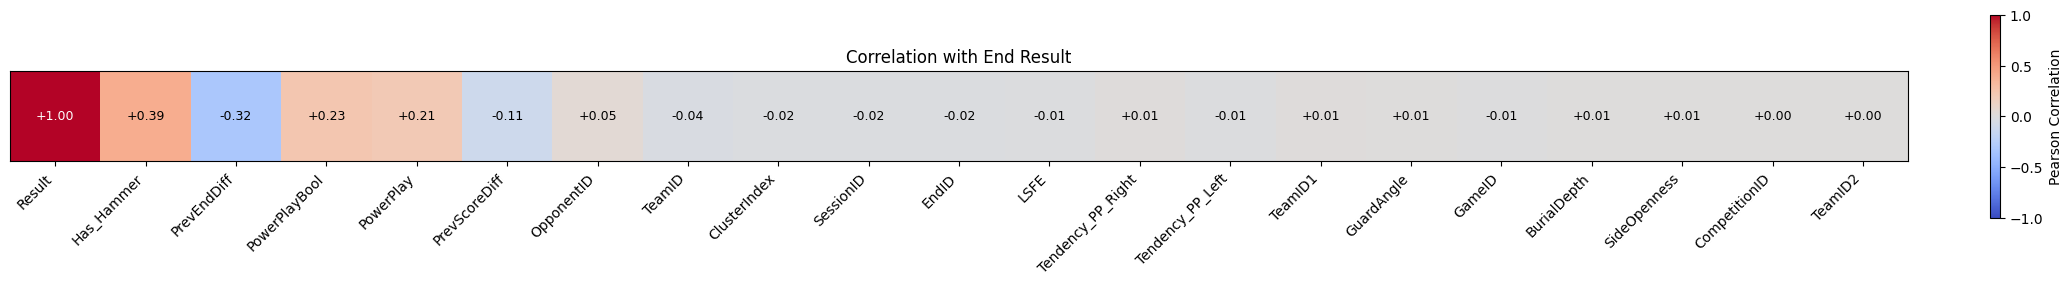

In [ ]:
ends.drop(LEAKAGE_FEATURES, axis=1, inplace=True)
numeric_df = ends.select_dtypes(include=[np.number])
corr = numeric_df.corr()

result_corr = (
    corr["Result"]
    .dropna()
    .sort_values(key=lambda x: x.abs(), ascending=False)
)

values = result_corr.values.reshape(1, -1)[:10]
labels = result_corr.index.tolist()[:10]

fig, ax = plt.subplots(figsize=(1 * len(labels), 2.8))

im = ax.imshow(values, cmap="coolwarm", vmin=-1, vmax=1)

for i in range(len(labels)):
    ax.text(
        i, 0,
        f"{values[0, i]:+.2f}",
        ha="center",
        va="center",
        fontsize=9,
        color="black" if abs(values[0, i]) < 0.6 else "white"
    )

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_yticks([])
ax.set_title("Correlation with End Result")

cbar = plt.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label("Pearson Correlation")

plt.tight_layout()

plt.savefig(
    "/Users/brentkong/Documents/curling/figures/analysis/result_correlation_heatmap.png",
    dpi=300
)

plt.show()
